# Analyse des Annonces de Vente Immobilière - Mubawab

Analyse exploratoire des données du marché immobilier marocain pour les villes de Casablanca, Rabat, Tanger et Marrakech.

## Étape 1: Préparation et Librairies

On importe les librairies nécessaires pour l'analyse et la visualisation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

## Étape 2: Chargement et Vérification Initiale

On charge le fichier CSV et on regarde sa structure.

In [3]:
# Charger les donnees du fichier CSV
df = pd.read_csv('../data/clean_data/annonces_nettoyees_mubawab.csv')

print('Dimensions du dataset:', df.shape)
print('\nColonnes disponibles:')
print(df.columns.tolist())
print('\nTypes de donnees:')
print(df.dtypes)
print('\nApercu des premieres donnees:')
df.head()

Dimensions du dataset: (14746, 9)

Colonnes disponibles:
['id', 'ville', 'prix', 'surface', 'quartier', 'type_bien', 'nb_chambres', 'nb_salle_de_bain', 'url_annonce']

Types de donnees:
id                   object
ville                object
prix                float64
surface             float64
quartier             object
type_bien            object
nb_chambres           int64
nb_salle_de_bain      int64
url_annonce          object
dtype: object

Apercu des premieres donnees:


,id,ville,prix,surface,quartier,type_bien,nb_chambres,nb_salle_de_bain,url_annonce
0,annonce_1,Casablanca,1380000.0,57.0,Bourgogne Ouest,Appartement,1,1,https://www.mubawab.ma/fr/a/8066263/studio-pre...
1,annonce_2,Casablanca,1350000.0,54.0,Casablanca Finance City,Appartement,1,1,https://www.mubawab.ma/fr/a/8247723/studio-pre...
2,annonce_4,Casablanca,1450000.0,83.0,Ferme Bretonne (Hay Arraha),Appartement,2,2,https://www.mubawab.ma/fr/a/7857210/appartemen...
3,annonce_5,Casablanca,2400000.0,84.0,Casablanca Finance City,Appartement,1,1,https://www.mubawab.ma/fr/a/8278144/vente-stud...
4,annonce_6,Marrakech,6700000.0,500.0,Agdal,Villa,6,1,https://www.mubawab.ma/fr/pa/7643604/splendide...


In [ ]:
# les quartier qu'on a par ville
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

quartiers_par_ville = df.groupby('ville')['quartier'].unique()

for ville, quartiers in quartiers_par_ville.items():
    print(f"\n{'='*60}")
    print(f"🏙️ {ville}")
    print(f"{'='*60}")
    print(f"Nombre de quartiers : {len(quartiers)}")
    print(f"\nQuartiers :")
    for i, quartier in enumerate(quartiers, 1):
        print(f"  {i:3d}. {quartier}")


🏙️ Casablanca
Nombre de quartiers : 184

Quartiers :
    1. Bourgogne Ouest
    2. Casablanca Finance City
    3. Ferme Bretonne (Hay Arraha)
    4. Gauthier
    5. Les princesses
    6. Oasis
    7. Mers Sultan
    8. Palmier
    9. Californie
   10. Ain Diab Extension
   11. Beauséjour
   12. Ain Chock
   13. Riviera
   14. Al Hadika
   15. Hay Hassani
   16. La Floride
   17. Maârif Extension
   18. Racine
   19. Laymoune
   20. Bernoussi
   21. Les Hôpitaux
   22. Bourgogne Est
   23. Sidi Maarouf
   24. Racine Extension
   25. Route Casablanca
   26. Nassim 2
   27. Al Azhar
   28. Sidi Moumen
   29. Maârif
   30. Roches Noires
   31. Aïn Sebaâ
   32. Anfa
   33. Tantonville
   34. Ain Diab
   35. Polo
   36. Beausite
   37. Mandarona
   38. CIL (Hay Salam)
   39. Val Fleury
   40. Plateau (Al Batha)
   41. Quartier Bachkou
   42. Belvédère
   43. Triangle d'Or
   44. Les Crêtes
   45. Derb Ghalef
   46. El Manar - El Hank
   47. Habbous
   48. Anfa Supérieur
   49. Longchamps (H

## Étape 3: Valeurs Manquantes et Répartition

Vérifier s'il y a des données manquantes et voir comment les annonces sont réparties par ville et type de bien.

In [5]:
# Verifier les donnees manquantes et les valeurs de base
print('Donnees manquantes:')
print(df.isnull().sum())
print('\nStatistiques sur le nombre unique de valeurs:')
print(f'Villes: {df["ville"].nunique()}')
print(f'Type de bien: {df["type_bien"].nunique()}')
print(f'Quartiers: {df["quartier"].nunique()}')
print('\nVilles dans le dataset:')
print(df['ville'].value_counts())

Donnees manquantes:
id                  0
ville               0
prix                0
surface             0
quartier            0
type_bien           0
nb_chambres         0
nb_salle_de_bain    0
url_annonce         0
dtype: int64

Statistiques sur le nombre unique de valeurs:
Villes: 4
Type de bien: 4
Quartiers: 396

Villes dans le dataset:
ville
Casablanca    6222
Marrakech     5388
Tanger        2092
Rabat         1044
Name: count, dtype: int64


## Étape 4: Statistiques de Base

Vue générale des chiffres avec moyennes, médianes, min et max.

In [6]:
# Statistiques de base pour tous les chiffres
print('Statistiques sur les prix, surfaces et caracteristiques:')
print(df[['prix', 'surface', 'nb_chambres', 'nb_salle_de_bain']].describe())
print('\nEcarts-types:')
print(df[['prix', 'surface', 'nb_chambres', 'nb_salle_de_bain']].std())

Statistiques sur les prix, surfaces et caracteristiques:
               prix        surface   nb_chambres  nb_salle_de_bain
count  1.474600e+04   14746.000000  14746.000000      14746.000000
mean   1.347294e+07     400.562945      3.425403          2.669673
std    8.248048e+08    2200.920841      2.662863          2.583380
min    6.200000e+03       0.287805      1.000000          1.000000
25%    1.150000e+06      86.000000      2.000000          1.000000
50%    2.150000e+06     133.000000      3.000000          2.000000
75%    4.900000e+06     300.000000      4.000000          3.000000
max    1.000000e+11  110000.000000    100.000000        100.000000

Ecarts-types:
prix                8.248048e+08
surface             2.200921e+03
nb_chambres         2.662863e+00
nb_salle_de_bain    2.583380e+00
dtype: float64


## Étape 5: Distributions des Données

Histogrammes pour voir comment les prix, surfaces et caractéristiques se distribuent.

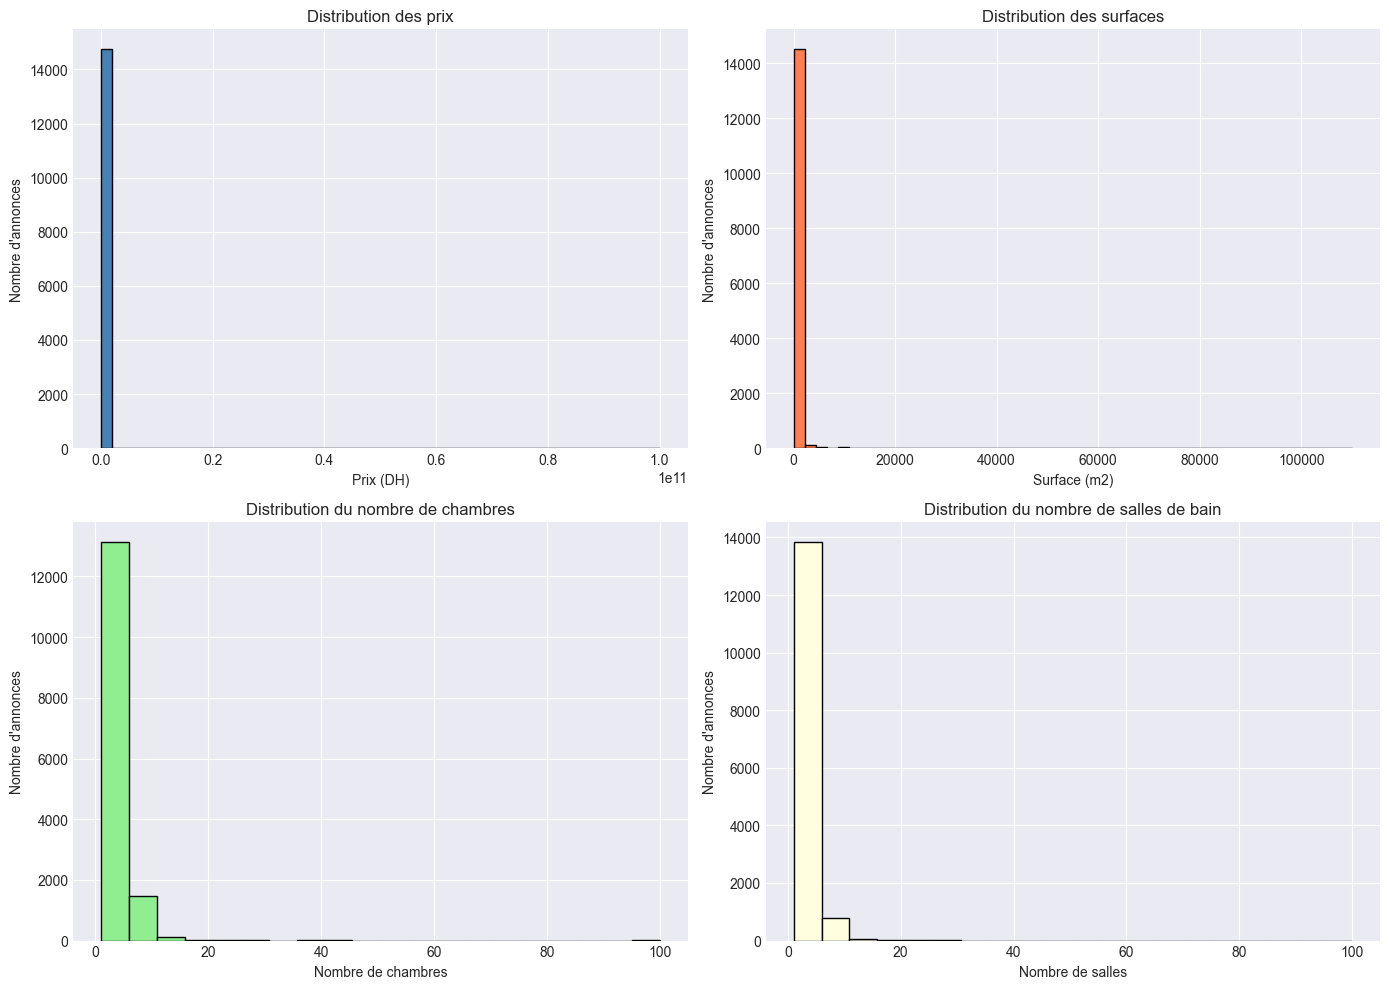

In [7]:
# Distribuer les donnees en histogrammes pour voir la forme
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(df['prix'], bins=50, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Distribution des prix')
axes[0, 0].set_xlabel('Prix (DH)')
axes[0, 0].set_ylabel('Nombre d\'annonces')

axes[0, 1].hist(df['surface'], bins=50, color='coral', edgecolor='black')
axes[0, 1].set_title('Distribution des surfaces')
axes[0, 1].set_xlabel('Surface (m2)')
axes[0, 1].set_ylabel('Nombre d\'annonces')

axes[1, 0].hist(df['nb_chambres'], bins=20, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Distribution du nombre de chambres')
axes[1, 0].set_xlabel('Nombre de chambres')
axes[1, 0].set_ylabel('Nombre d\'annonces')

axes[1, 1].hist(df['nb_salle_de_bain'], bins=20, color='lightyellow', edgecolor='black')
axes[1, 1].set_title('Distribution du nombre de salles de bain')
axes[1, 1].set_xlabel('Nombre de salles')
axes[1, 1].set_ylabel('Nombre d\'annonces')

plt.tight_layout()
plt.savefig('../visualisation descriptive/vente_mubawab_graphique/distributions_base.png', dpi=300, bbox_inches='tight')
plt.show()

## Étape 6: Analyse du Prix par Type de Bien

Voir quels types de bien (appartement, villa, etc.) ont quel prix en moyenne.

C:\Users\Z01X\AppData\Local\Temp\ipykernel_12148\1489924305.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type_bien', y='prix', data=df, ax=ax, palette='Set2')


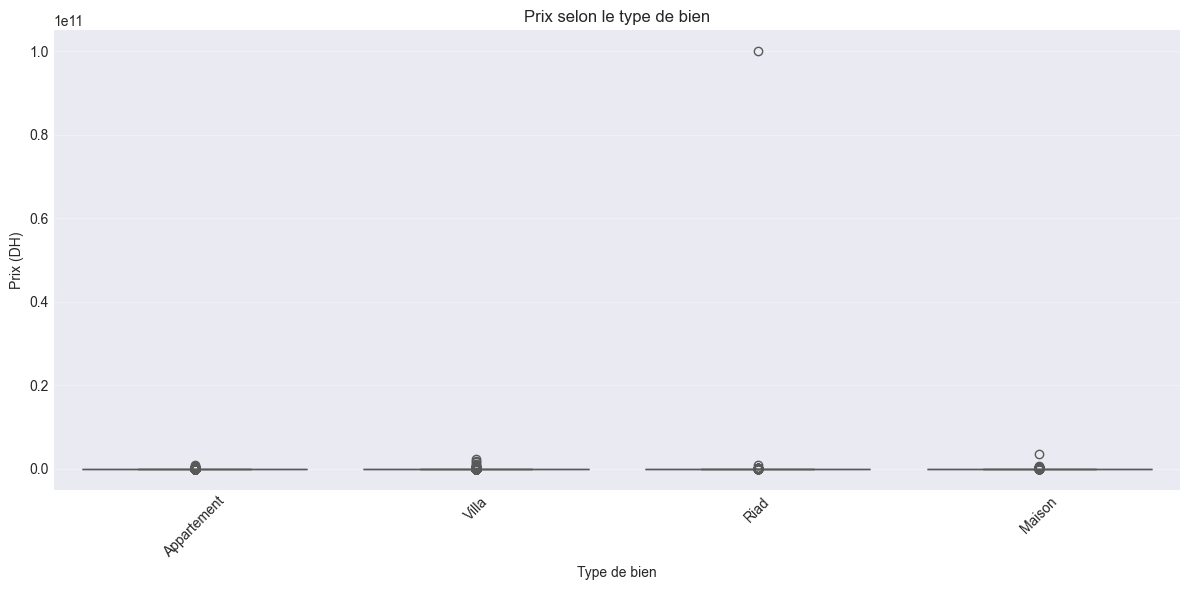

Prix moyen par type de bien:
             count          mean     median     min           max
type_bien                                                        
Appartement   9294  3.726502e+06  1550000.0  6200.0  9.500000e+08
Maison         860  1.410087e+07  2650000.0  7500.0  3.500000e+09
Riad           822  1.272934e+08  2675000.0  7000.0  1.000000e+11
Villa         3770  1.254006e+07  6250000.0  6800.0  2.300000e+09

Type le plus cher en moyenne: Riad
Type le moins cher en moyenne: Appartement


In [8]:
# Analyser les prix par type de bien
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='type_bien', y='prix', data=df, ax=ax, palette='Set2')
ax.set_title('Prix selon le type de bien')
ax.set_xlabel('Type de bien')
ax.set_ylabel('Prix (DH)')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../visualisation descriptive/vente_mubawab_graphique/prix_type.png', dpi=300, bbox_inches='tight')
plt.show()

print('Prix moyen par type de bien:')
stats_type = df.groupby('type_bien')['prix'].agg(['count', 'mean', 'median', 'min', 'max'])
print(stats_type)
print('\nType le plus cher en moyenne:', stats_type['mean'].idxmax())
print('Type le moins cher en moyenne:', stats_type['mean'].idxmin())

## Étape 7: Analyse du Prix par Ville

Comparer les prix moyens entre Casablanca, Rabat, Tanger et Marrakech.

C:\Users\Z01X\AppData\Local\Temp\ipykernel_12148\1573404506.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ville', y='prix', data=df, ax=ax, palette='husl')


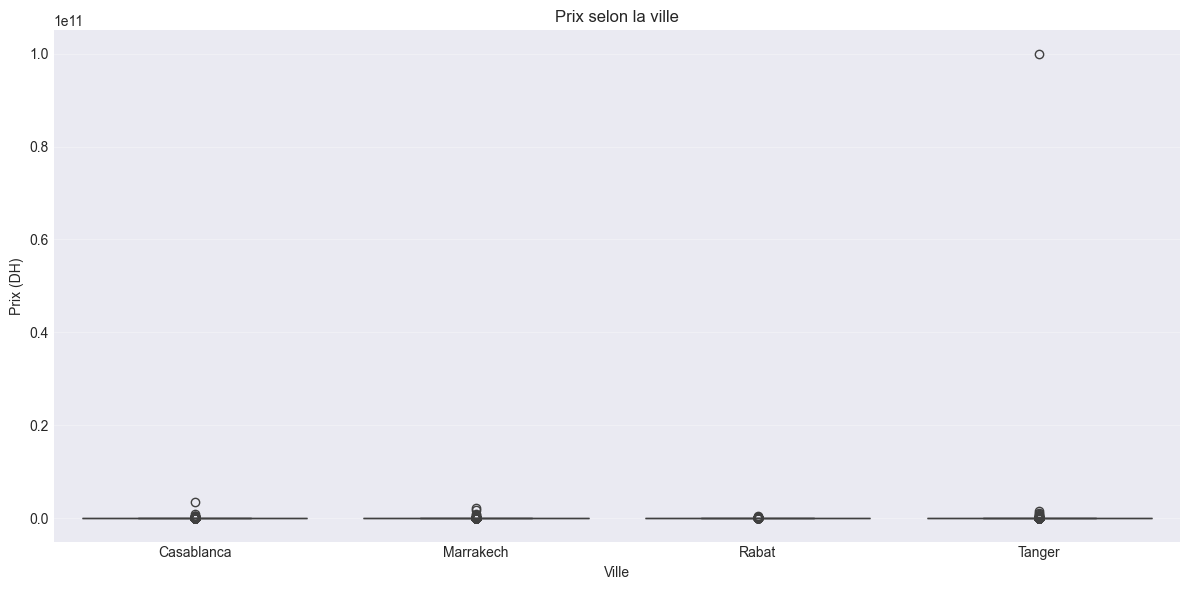

Prix moyen par ville:
            count          mean     median     min           max
ville                                                           
Casablanca   6222  4.900186e+06  1800000.0  6400.0  3.500000e+09
Marrakech    5388  5.228811e+06  2390000.0  6200.0  2.300000e+09
Rabat        1044  1.007145e+07  5800000.0  7000.0  5.700000e+08
Tanger       2092  6.190041e+07  2028000.0  6500.0  1.000000e+11

Ville avec les prix les plus eleves: Tanger
Ville avec les prix les moins eleves: Casablanca


In [9]:
# Analyser les prix par ville
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='ville', y='prix', data=df, ax=ax, palette='husl')
ax.set_title('Prix selon la ville')
ax.set_xlabel('Ville')
ax.set_ylabel('Prix (DH)')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../visualisation descriptive/vente_mubawab_graphique/prix_ville.png', dpi=300, bbox_inches='tight')
plt.show()

print('Prix moyen par ville:')
stats_ville = df.groupby('ville')['prix'].agg(['count', 'mean', 'median', 'min', 'max'])
print(stats_ville)
print('\nVille avec les prix les plus eleves:', stats_ville['mean'].idxmax())
print('Ville avec les prix les moins eleves:', stats_ville['mean'].idxmin())

## Étape 8: Analyse des Surfaces

Regarder la taille des biens par type et par ville.

C:\Users\Z01X\AppData\Local\Temp\ipykernel_12148\392476311.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type_bien', y='surface', data=df, ax=axes[0], palette='Set2')
C:\Users\Z01X\AppData\Local\Temp\ipykernel_12148\392476311.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ville', y='surface', data=df, ax=axes[1], palette='husl')


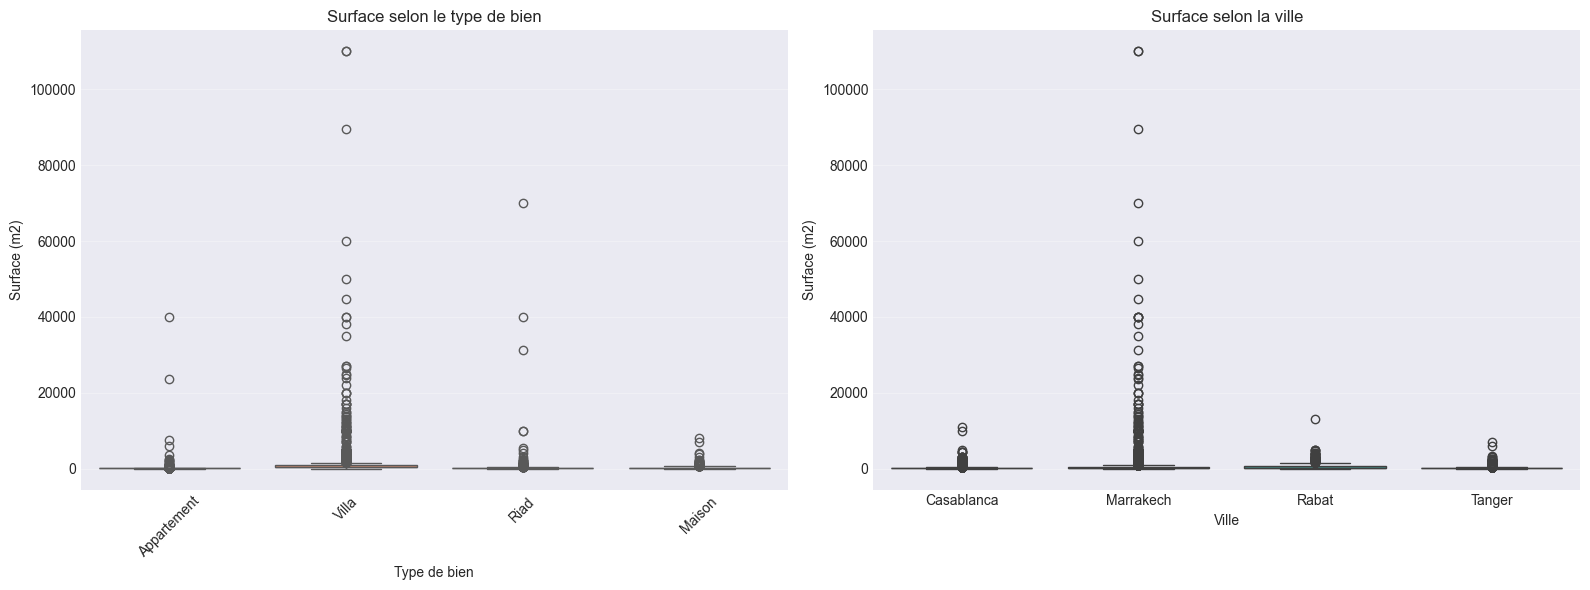

Surface moyenne par type:
             count         mean  median
type_bien                              
Appartement   9294   127.621587   100.0
Maison         860   258.692281   140.0
Riad           822   449.359423   164.0
Villa         3770  1095.155793   497.0

Surface moyenne par ville:
            count        mean  median
ville                                
Casablanca   6222  210.017936   121.0
Marrakech    5388  657.031267   166.0
Rabat        1044  624.397279   256.0
Tanger       2092  195.035542   107.0


In [10]:
# Analyser les surfaces par type et par ville
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='type_bien', y='surface', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Surface selon le type de bien')
axes[0].set_xlabel('Type de bien')
axes[0].set_ylabel('Surface (m2)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

sns.boxplot(x='ville', y='surface', data=df, ax=axes[1], palette='husl')
axes[1].set_title('Surface selon la ville')
axes[1].set_xlabel('Ville')
axes[1].set_ylabel('Surface (m2)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../visualisation descriptive/vente_mubawab_graphique/surfaces_analyse.png', dpi=300, bbox_inches='tight')
plt.show()

print('Surface moyenne par type:')
print(df.groupby('type_bien')['surface'].agg(['count', 'mean', 'median']))
print('\nSurface moyenne par ville:')
print(df.groupby('ville')['surface'].agg(['count', 'mean', 'median']))

## Étape 9: Volume du Marché

Voir où il y a le plus d'annonces par type de bien et par ville.

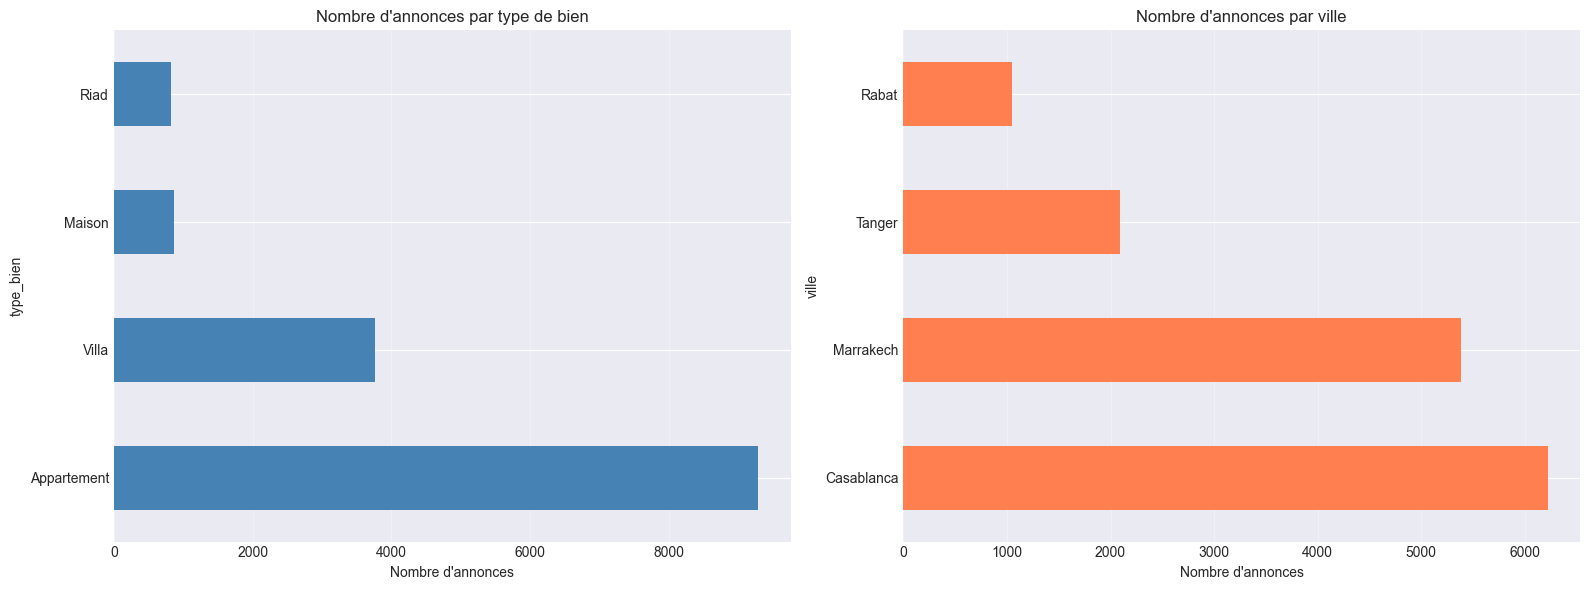

Nombre total d'annonces: 14746

Annonces par type:
type_bien
Appartement    9294
Villa          3770
Maison          860
Riad            822
Name: count, dtype: int64

Annonces par ville:
ville
Casablanca    6222
Marrakech     5388
Tanger        2092
Rabat         1044
Name: count, dtype: int64

Croisement type x ville:
ville        Casablanca  Marrakech  Rabat  Tanger
type_bien                                        
Appartement        5056       2184    485    1569
Maison              269        340     46     205
Riad                 10        763     23      26
Villa               887       2101    490     292


In [11]:
# Voir combien d'annonces par type et par ville
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

type_counts = df['type_bien'].value_counts()
type_counts.plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('Nombre d\'annonces par type de bien')
axes[0].set_xlabel('Nombre d\'annonces')
axes[0].grid(axis='x', alpha=0.3)

ville_counts = df['ville'].value_counts()
ville_counts.plot(kind='barh', ax=axes[1], color='coral')
axes[1].set_title('Nombre d\'annonces par ville')
axes[1].set_xlabel('Nombre d\'annonces')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../visualisation descriptive/vente_mubawab_graphique/volume_marche.png', dpi=300, bbox_inches='tight')
plt.show()

print('Nombre total d\'annonces:', len(df))
print('\nAnnonces par type:')
print(type_counts)
print('\nAnnonces par ville:')
print(ville_counts)
print('\nCroisement type x ville:')
print(pd.crosstab(df['type_bien'], df['ville']))

## Étape 10: Prix au Mètre Carré

Calculer et analyser le prix par m² pour faire des comparaisons équitables.

Statistiques du prix au m2:
count    1.474600e+04
mean     6.182850e+04
std      3.173593e+06
min      3.500000e+00
25%      1.000000e+04
50%      1.480000e+04
75%      2.058824e+04
max      3.846154e+08
Name: prix_m2, dtype: float64


C:\Users\Z01X\AppData\Local\Temp\ipykernel_12148\2563278751.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ville', y='prix_m2', data=df, ax=ax, palette='Set2')


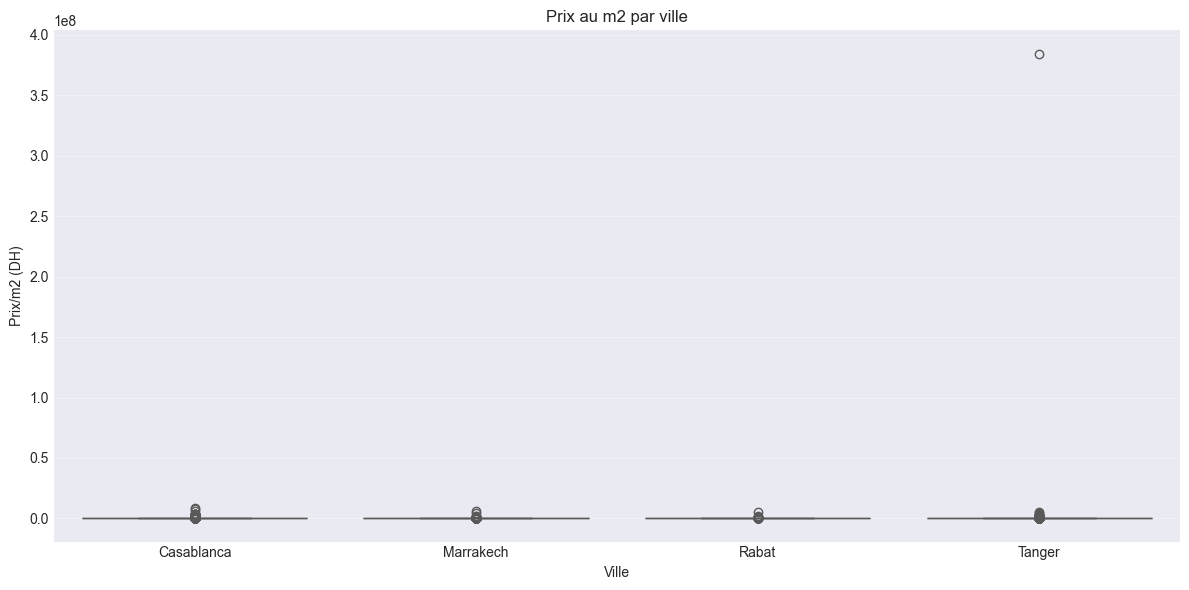


Prix moyen au m2 par ville:
                     mean        median        min           max
ville                                                           
Casablanca   27796.619683  14830.508475   5.454545  8.695652e+06
Marrakech    20048.509827  14000.000000   6.857143  6.333333e+06
Rabat        29559.865872  17500.000000  30.172414  5.333333e+06
Tanger      286754.571444  15000.000000   3.500000  3.846154e+08

Prix moyen au m2 par type:
                      mean        median        min           max
type_bien                                                        
Appartement   36163.352161  15142.857143   6.857143  8.695652e+06
Maison        90746.611997  16541.353383  31.250000  5.833333e+06
Riad         498672.387558  15000.000000  30.172414  3.846154e+08
Villa         23254.646730  13333.333333   3.500000  6.333333e+06


In [12]:
# Calculer le prix par metre carre
df['prix_m2'] = df['prix'] / df['surface']

print('Statistiques du prix au m2:')
print(df['prix_m2'].describe())

# Boxplot prix/m2 par ville
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='ville', y='prix_m2', data=df, ax=ax, palette='Set2')
ax.set_title('Prix au m2 par ville')
ax.set_xlabel('Ville')
ax.set_ylabel('Prix/m2 (DH)')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../visualisation descriptive/vente_mubawab_graphique/prix_m2_ville.png', dpi=300, bbox_inches='tight')
plt.show()

print('\nPrix moyen au m2 par ville:')
print(df.groupby('ville')['prix_m2'].agg(['mean', 'median', 'min', 'max']))
print('\nPrix moyen au m2 par type:')
print(df.groupby('type_bien')['prix_m2'].agg(['mean', 'median', 'min', 'max']))

## Étape 11: Heatmap Prix/m² par Ville et Type

Matrice pour voir le prix au m² selon le type de bien et la ville.

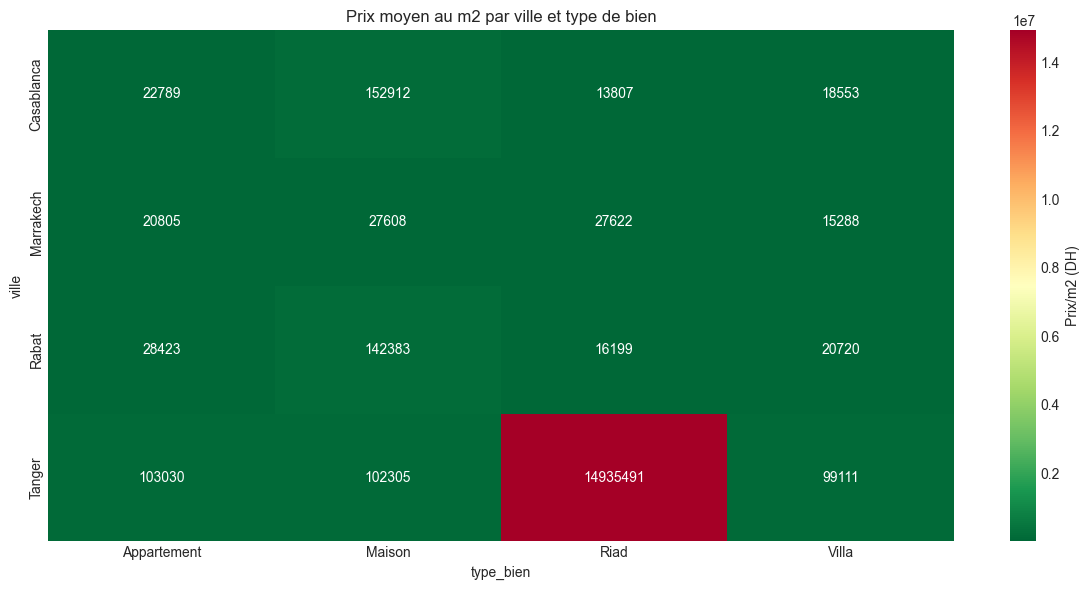

In [13]:
# Heatmap pour voir prix/m2 par ville et type
fig, ax = plt.subplots(figsize=(12, 6))
pivot_prix_m2 = df.pivot_table(values='prix_m2', index='ville', columns='type_bien', aggfunc='mean')
sns.heatmap(pivot_prix_m2, annot=True, fmt='.0f', cmap='RdYlGn_r', ax=ax, cbar_kws={'label': 'Prix/m2 (DH)'})
ax.set_title('Prix moyen au m2 par ville et type de bien')
plt.tight_layout()
plt.savefig('../visualisation descriptive/vente_mubawab_graphique/heatmap_prix_m2.png', dpi=300, bbox_inches='tight')
plt.show()

## Étape 12: Corrélations entre Variables

Voir les liens entre le prix et les autres caractéristiques (surface, chambres, salles).

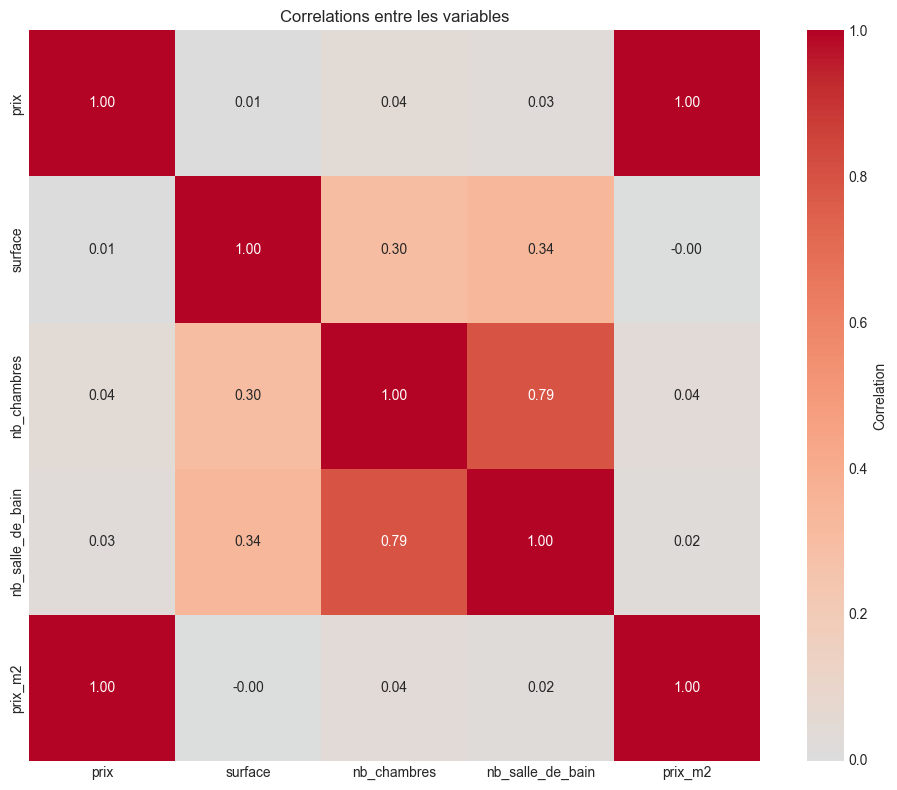

Matrice de correlation:
                      prix   surface  nb_chambres  nb_salle_de_bain   prix_m2
prix              1.000000  0.006535     0.041892          0.029683  0.998568
surface           0.006535  1.000000     0.303150          0.337276 -0.001617
nb_chambres       0.041892  0.303150     1.000000          0.793998  0.036125
nb_salle_de_bain  0.029683  0.337276     0.793998          1.000000  0.022815
prix_m2           0.998568 -0.001617     0.036125          0.022815  1.000000

Correlations les plus fortes avec le prix:
prix                1.000000
prix_m2             0.998568
nb_chambres         0.041892
nb_salle_de_bain    0.029683
surface             0.006535
Name: prix, dtype: float64


In [14]:
# Chercher les correlations entre les variables
fig, ax = plt.subplots(figsize=(10, 8))
corr_matrix = df[['prix', 'surface', 'nb_chambres', 'nb_salle_de_bain', 'prix_m2']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax, square=True, cbar_kws={'label': 'Correlation'})
ax.set_title('Correlations entre les variables')
plt.tight_layout()
plt.savefig('../visualisation descriptive/vente_mubawab_graphique/correlations.png', dpi=300, bbox_inches='tight')
plt.show()

print('Matrice de correlation:')
print(corr_matrix)
print('\nCorrelations les plus fortes avec le prix:')
print(corr_matrix['prix'].sort_values(ascending=False))

## Étape 13: Scatter Plots de Relations

Graphiques pour visualiser les relations entre les variables principales.

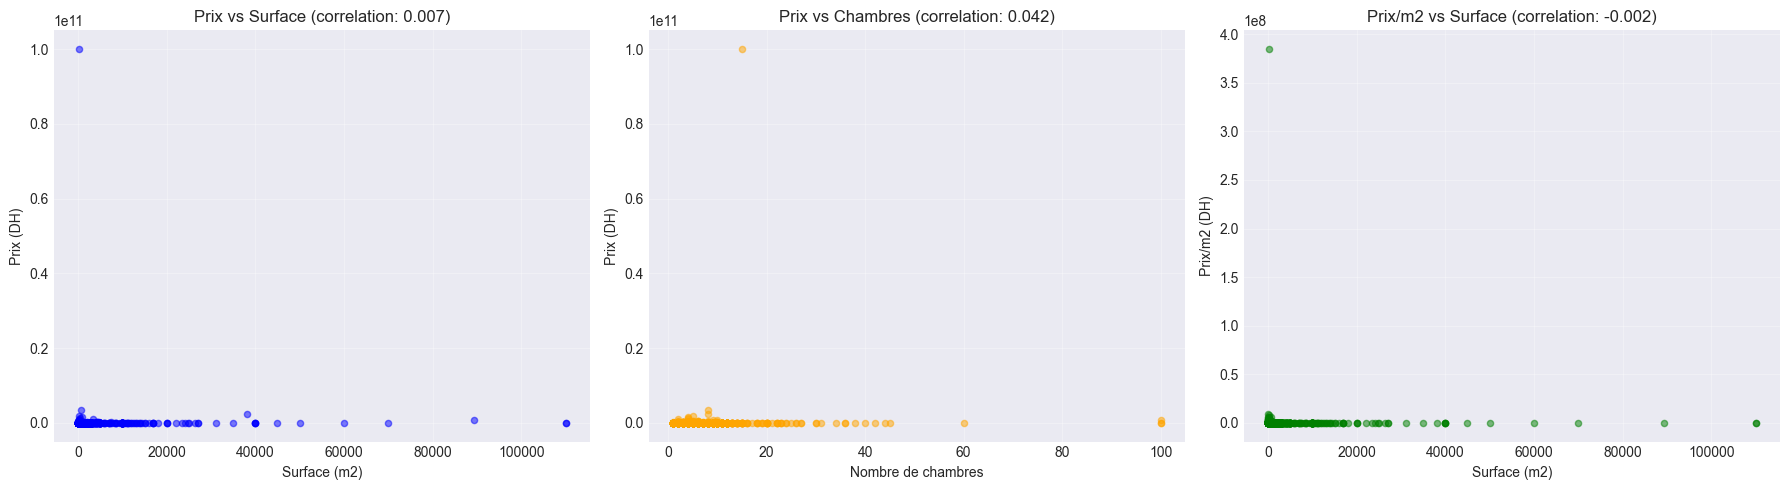

In [15]:
# Scatter plots pour les relations principales
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(df['surface'], df['prix'], alpha=0.5, s=20, color='blue')
axes[0].set_xlabel('Surface (m2)')
axes[0].set_ylabel('Prix (DH)')
axes[0].set_title(f'Prix vs Surface (correlation: {corr_matrix.loc["prix", "surface"]:.3f})')
axes[0].grid(alpha=0.3)

axes[1].scatter(df['nb_chambres'], df['prix'], alpha=0.5, s=20, color='orange')
axes[1].set_xlabel('Nombre de chambres')
axes[1].set_ylabel('Prix (DH)')
axes[1].set_title(f'Prix vs Chambres (correlation: {corr_matrix.loc["prix", "nb_chambres"]:.3f})')
axes[1].grid(alpha=0.3)

axes[2].scatter(df['surface'], df['prix_m2'], alpha=0.5, s=20, color='green')
axes[2].set_xlabel('Surface (m2)')
axes[2].set_ylabel('Prix/m2 (DH)')
axes[2].set_title(f'Prix/m2 vs Surface (correlation: {corr_matrix.loc["prix_m2", "surface"]:.3f})')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../visualisation descriptive/vente_mubawab_graphique/scatter_relations.png', dpi=300, bbox_inches='tight')
plt.show()

## Résumé Final

Les chiffres clés du marché immobilier analysé.

In [16]:
# Resume final avec les insights principaux
print('\n=== RESUME DES DONNEES ===')
print(f'\nTotal d\'annonces: {len(df)}')
print(f'Villes analysees: {df["ville"].nunique()}')
print(f'Types de bien: {df["type_bien"].nunique()}')
print(f'\nPrix moyen: {df["prix"].mean():,.0f} DH')
print(f'Prix median: {df["prix"].median():,.0f} DH')
print(f'Prix min: {df["prix"].min():,.0f} DH')
print(f'Prix max: {df["prix"].max():,.0f} DH')
print(f'\nSurface moyenne: {df["surface"].mean():,.0f} m2')
print(f'Surface median: {df["surface"].median():,.0f} m2')
print(f'\nNombre moyen de chambres: {df["nb_chambres"].mean():.1f}')
print(f'Nombre moyen de salles: {df["nb_salle_de_bain"].mean():.1f}')
print(f'\nPrix moyen au m2: {df["prix_m2"].mean():,.0f} DH/m2')
print(f'Prix median au m2: {df["prix_m2"].median():,.0f} DH/m2')


=== RESUME DES DONNEES ===

Total d'annonces: 14746
Villes analysees: 4
Types de bien: 4

Prix moyen: 13,472,945 DH
Prix median: 2,150,000 DH
Prix min: 6,200 DH
Prix max: 99,999,997,952 DH

Surface moyenne: 401 m2
Surface median: 133 m2

Nombre moyen de chambres: 3.4
Nombre moyen de salles: 2.7

Prix moyen au m2: 61,828 DH/m2
Prix median au m2: 14,800 DH/m2
